In [1]:
from sklearn import datasets 
 
circles_data, circles_data_labels = datasets.make_circles(n_samples=100, factor=0.1, noise=0.1) 

In [2]:
circles_data_labels

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [3]:
from sklearn.model_selection import train_test_split

def split_dataset(data, labels, train_size):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=train_size, random_state=42)
    return X_train, X_test, y_train, y_test

train_size = 0.7
X_train, X_test, y_train, y_test = split_dataset(circles_data, circles_data_labels, train_size)

print("Training set size:", len(X_train), len(y_train))
print("Test set size:", len(X_test), len(y_test))


Training set size: 70 70
Test set size: 30 30


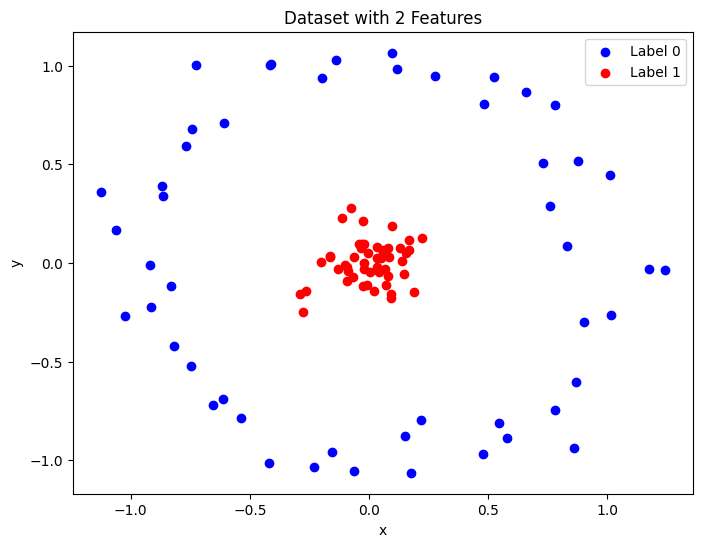

In [4]:
import matplotlib.pyplot as plt

def plot_data(features, labels):
    blue_points = features[labels == 0]
    red_points = features[labels == 1]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', label='Label 0')
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', label='Label 1')
    
    plt.title('Dataset with 2 Features')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plot_data(circles_data, circles_data_labels)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class SimpleNN(nn.Module):
    def __init__(self, channel):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, channel)  # 2 input features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(channel, 1)  # Binary classification, output 1 value
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [6]:
X = torch.Tensor(circles_data)
y = torch.Tensor(circles_data_labels).view(-1, 1)  # Reshape for consistency with output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% testing

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Training set size:", len(train_dataset))
print("Test set size:", len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


Training set size: 70
Test set size: 30


In [7]:
circles_data.shape, circles_data_labels.shape

((100, 2), (100,))

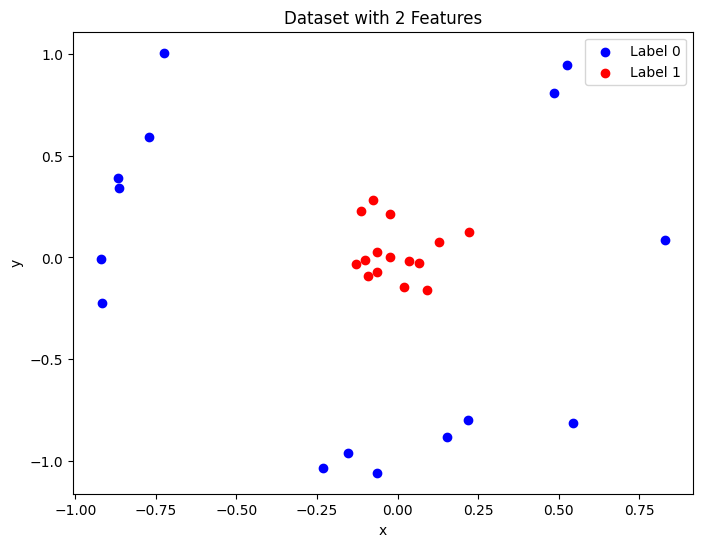

In [8]:
import torch

def get_all_features_labels(dataloader):
    all_features = []
    all_labels = []

    for features, labels in dataloader:
        all_features.append(features)
        all_labels.append(labels)

    # Concatenate all features and labels along the first dimension
    all_features = torch.cat(all_features, dim=0)
    all_labels = torch.cat(all_labels, dim=0)

    return all_features, all_labels

all_features, all_labels = get_all_features_labels(test_loader)
plot_data(all_features, all_labels.flatten())


In [9]:
all_features.shape, all_labels.flatten().shape

(torch.Size([30, 2]), torch.Size([30]))

In [10]:
model = SimpleNN(10)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

epochs = 1000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    if epoch % 10 == 9:  # Print every 10 epochs
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 10/1000, Loss: 0.7160347104072571
Epoch 20/1000, Loss: 0.6517422795295715
Epoch 30/1000, Loss: 0.6490101218223572
Epoch 40/1000, Loss: 0.654310941696167
Epoch 50/1000, Loss: 0.6957972645759583
Epoch 60/1000, Loss: 0.6736817359924316
Epoch 70/1000, Loss: 0.6069434285163879
Epoch 80/1000, Loss: 0.6327140927314758
Epoch 90/1000, Loss: 0.6104519963264465
Epoch 100/1000, Loss: 0.5515686273574829
Epoch 110/1000, Loss: 0.5335687398910522
Epoch 120/1000, Loss: 0.5565291047096252
Epoch 130/1000, Loss: 0.602532684803009
Epoch 140/1000, Loss: 0.5099732279777527
Epoch 150/1000, Loss: 0.4915073812007904
Epoch 160/1000, Loss: 0.4770362675189972
Epoch 170/1000, Loss: 0.4392991364002228
Epoch 180/1000, Loss: 0.5242413878440857
Epoch 190/1000, Loss: 0.2795724868774414
Epoch 200/1000, Loss: 0.4846348762512207
Epoch 210/1000, Loss: 0.3224821388721466
Epoch 220/1000, Loss: 0.32206496596336365
Epoch 230/1000, Loss: 0.3797013461589813
Epoch 240/1000, Loss: 0.21963363885879517
Epoch 250/1000, Loss: 0.4

In [11]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted = (outputs.data > 0.5).float()  # Convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

# Assuming you have a test_loader which is a DataLoader object for your test dataset
test_accuracy = evaluate_model(model, test_loader)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 100.00%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(100, 2)
(100,)


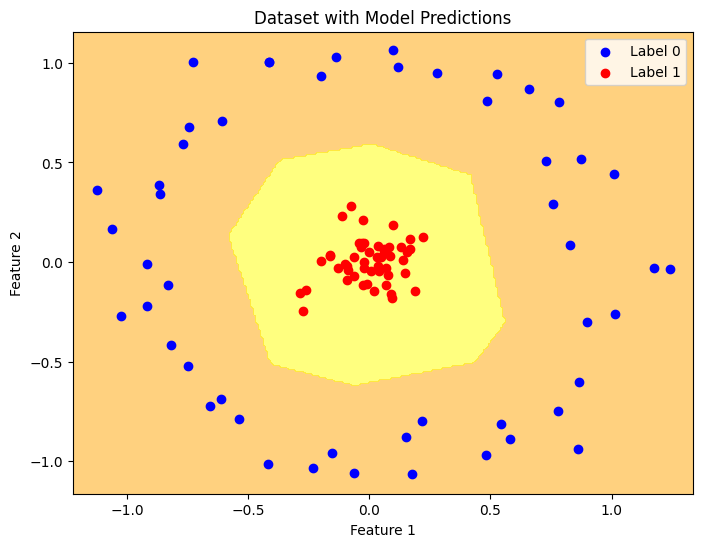

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_predictions(model, features, labels):
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)
    # Generate a mesh grid to plot decision boundary
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        Z = (Z > 0.5).float()  # Convert to binary predictions

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data_with_predictions(model, circles_data, circles_data_labels)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(30, 2)
(30,)


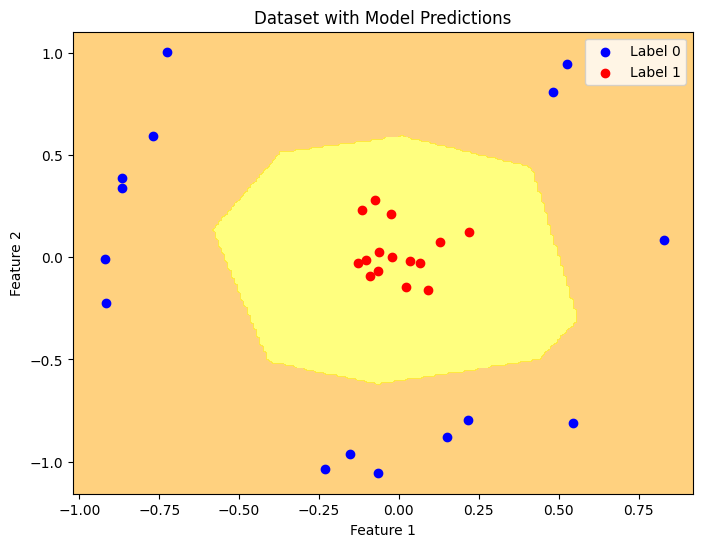

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_predictions(model, dataloader):
    

    all_features = []
    all_labels = []
    
    # Iterate over the DataLoader to accumulate all features and labels
    for batch_features, batch_labels in dataloader:
        # Assuming features and labels are tensors, adjust if necessary
        all_features.append(batch_features.numpy())
        all_labels.append(batch_labels.numpy())

    # Concatenate all features and labels
    features = np.concatenate(all_features, axis=0)
    labels = np.concatenate(all_labels, axis=0).flatten()
    print(type(features))
    print(type(labels))
    print(features.shape)
    print(labels.shape)

    
    # Generate a mesh grid to plot decision boundary
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict over the mesh grid
    model.eval()
    with torch.no_grad():
        Z = model(torch.Tensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        Z = (Z > 0.5).float()  # Convert to binary predictions

    # print(labels == 0)
    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0.5, 2], colors=['orange', 'yellow'])
    plt.scatter(features[labels == 0, 0], features[labels == 0, 1], c='blue', label='Label 0')
    plt.scatter(features[labels == 1, 0], features[labels == 1, 1], c='red', label='Label 1')

    plt.title('Dataset with Model Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_data_with_predictions(model, test_loader)
